## Linear Regression with Regularization
In class, we have learned linear regression. In this section, we will take through a simple experiment to see how it works. We are going to use `numpy` and `matplotlib` packages in Python, the first thing we need to do is to import them.

In [1]:
%matplotlib notebook
# import packages
import numpy as np
import matplotlib.pyplot as plt
# for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
# there might be some warnings due to the different versions of python and packages you installed.
# here we choose to suppress these warnings.
# but don't ignore warnings unless you know you are absolutely right!
import warnings
warnings.filterwarnings("ignore")

Our experiment consists of three steps:
1. Generation of training dataset.
2. Implementation of our models
3. Visualization of experimental results.

And we will have an analytical question in the end.

### Generation of training dataset
Linear model is defined as
$$
\boldsymbol{y}=\boldsymbol {X \boldsymbol\theta}+ \boldsymbol \varepsilon,
$$
    where $\boldsymbol X = [\boldsymbol x^{(1)}\cdots \boldsymbol x^{(m)}]^T$ is the observation matrix which consists of $m$ samples, $\boldsymbol x^{(i)}$ is the feature vector of $i$-th sample, whose length is also known as *the number of features*; $\boldsymbol \theta$ is the weight vector and $\boldsymbol\varepsilon$ is the Gaussian noise. We will generate training data based on the defination of linear model. Here the number of features is set as $2$. For simplicity, we just set $\boldsymbol \theta = \boldsymbol 1$, where $\boldsymbol 1$ is a vector with all components equal to $1$.

In [2]:
num_features = 2
theta_ = np.ones(num_features)

Now given the the number of samples, we generate a random observation matrix $\boldsymbol X$. The corresponding labels $\boldsymbol y$ is computed through $\boldsymbol{X\theta}$ plus some Gaussian noise.

In [3]:
num_samples = 100
# range of x: [-0.5, 0.5]
X = np.random.rand(num_samples, num_features)-0.5
# X@y is equivalent to np.matmul(X, y)
y = X@theta_ + np.random.normal(scale=0.2, size=(num_samples))
print(X)
print(y)

[[ 0.37465284 -0.36248214]
 [ 0.47454827  0.2191084 ]
 [-0.44194114 -0.42664765]
 [ 0.38661968 -0.21837805]
 [-0.15694347 -0.05824104]
 [-0.38667626 -0.29163293]
 [ 0.31899238  0.20380873]
 [ 0.25474494  0.14655698]
 [ 0.20815634 -0.02895813]
 [ 0.21096248  0.45527865]
 [ 0.18235459  0.32854229]
 [ 0.27148853  0.46060043]
 [ 0.49417109  0.20973341]
 [ 0.48245227 -0.4245425 ]
 [-0.04918726 -0.39765138]
 [ 0.44418313  0.46067837]
 [-0.15466931  0.41339587]
 [-0.3641336  -0.04628471]
 [-0.10228956  0.48650175]
 [-0.37917696 -0.12855416]
 [ 0.01806684 -0.47018894]
 [ 0.01741408  0.19498837]
 [-0.27596401 -0.3834758 ]
 [-0.20871225  0.2293375 ]
 [ 0.20039099  0.35793112]
 [ 0.19307773 -0.0196155 ]
 [ 0.28221999 -0.33104327]
 [-0.16608795  0.49338966]
 [-0.0826404   0.21246471]
 [-0.43983742  0.20421389]
 [-0.22670846 -0.4350755 ]
 [ 0.3049542   0.11118252]
 [ 0.0020041  -0.23089766]
 [ 0.09106832  0.25103589]
 [ 0.25760487 -0.08254523]
 [ 0.06754306 -0.42423146]
 [ 0.19596306  0.24031436]
 

### Implementation of our models
Note that in real life we can only get $\boldsymbol {X}$ and $\boldsymbol {y}$. $\boldsymbol\theta$ is the weight vector we want to esimate through linear regression. To minimize the noise effect, we do a minimization problem
$$
\min _{\boldsymbol\theta}\|\boldsymbol y-\boldsymbol X \boldsymbol{\theta}\|^{2}
$$
and we can get the best estimator by solving the normal equation
$$
\boldsymbol X^{T} \boldsymbol {X\theta}=\boldsymbol{X}^T \boldsymbol{y},\\
\boldsymbol \theta =  (\boldsymbol X^{T} \boldsymbol X)^{-1} \boldsymbol{X}^T \boldsymbol{y}.
$$
Transfer the above formula into code and we get the analytical solution of linear regression. In review section we learned that the inversion of matrix can be computed through `numpy.linalg.inv`.

In [4]:
def linear_regression(X, y):
    return np.linalg.inv((X.transpose()@X))@X.transpose()@y
theta_linear_regression = linear_regression(X, y)
print(theta_linear_regression)

[1.00339861 0.97034581]


By now, we have implemented our linear regression model. We can also add a regularization in linear model and we have
$$
\min _{\boldsymbol\theta}\|\boldsymbol y-\boldsymbol X \boldsymbol{\theta}\|^{2}+\alpha\|\boldsymbol{\theta}\|^{2},
$$
where $\alpha \geq 0$ is a hyper-parameter and defines the strength of regularization. This method is known as *ridge regression*. Minimizing the loss $\|\boldsymbol y-\boldsymbol X \boldsymbol{\theta}\|^{2}+\alpha\|\boldsymbol{\theta}\|^{2}$ is equivalent to solve the normal equation 
$$
\left(\boldsymbol X^{T} \boldsymbol X+\alpha \boldsymbol I\right) \boldsymbol{\theta}=\boldsymbol X^{T} \boldsymbol{y},\\
\boldsymbol{\theta} = \left(\boldsymbol X^{T} \boldsymbol X+\alpha \boldsymbol I\right)^{-1}\boldsymbol X^{T} \boldsymbol{y}
$$
#### Q1. Now, please implement ridge regression by completing following code. You should give an analytical solution instead of using gradient descent to get a numerical solution.

In [5]:
def ridge_regression(X, y, alpha = 1):
    return np.linalg.inv(X.transpose()@X + alpha * np.eye(X.shape[1]) )@X.transpose()@y
theta_ridge_regression = ridge_regression(X, y)
print(theta_ridge_regression)

[0.9208622  0.88217297]


### Visualization of experimental results
So far we have finished the implementation of linear regression and ridge regression models. To better understand our work, we will plot train data, linear regression model and ridge regression model on the same figure using `matplotlib` package. *Note that because the number of features is $2$, we need to use 3D figure for visualization. If you are running jupyter notebook on PC, you should be able to drag the mouse to rotate the figure.*

<IPython.core.display.Javascript object>


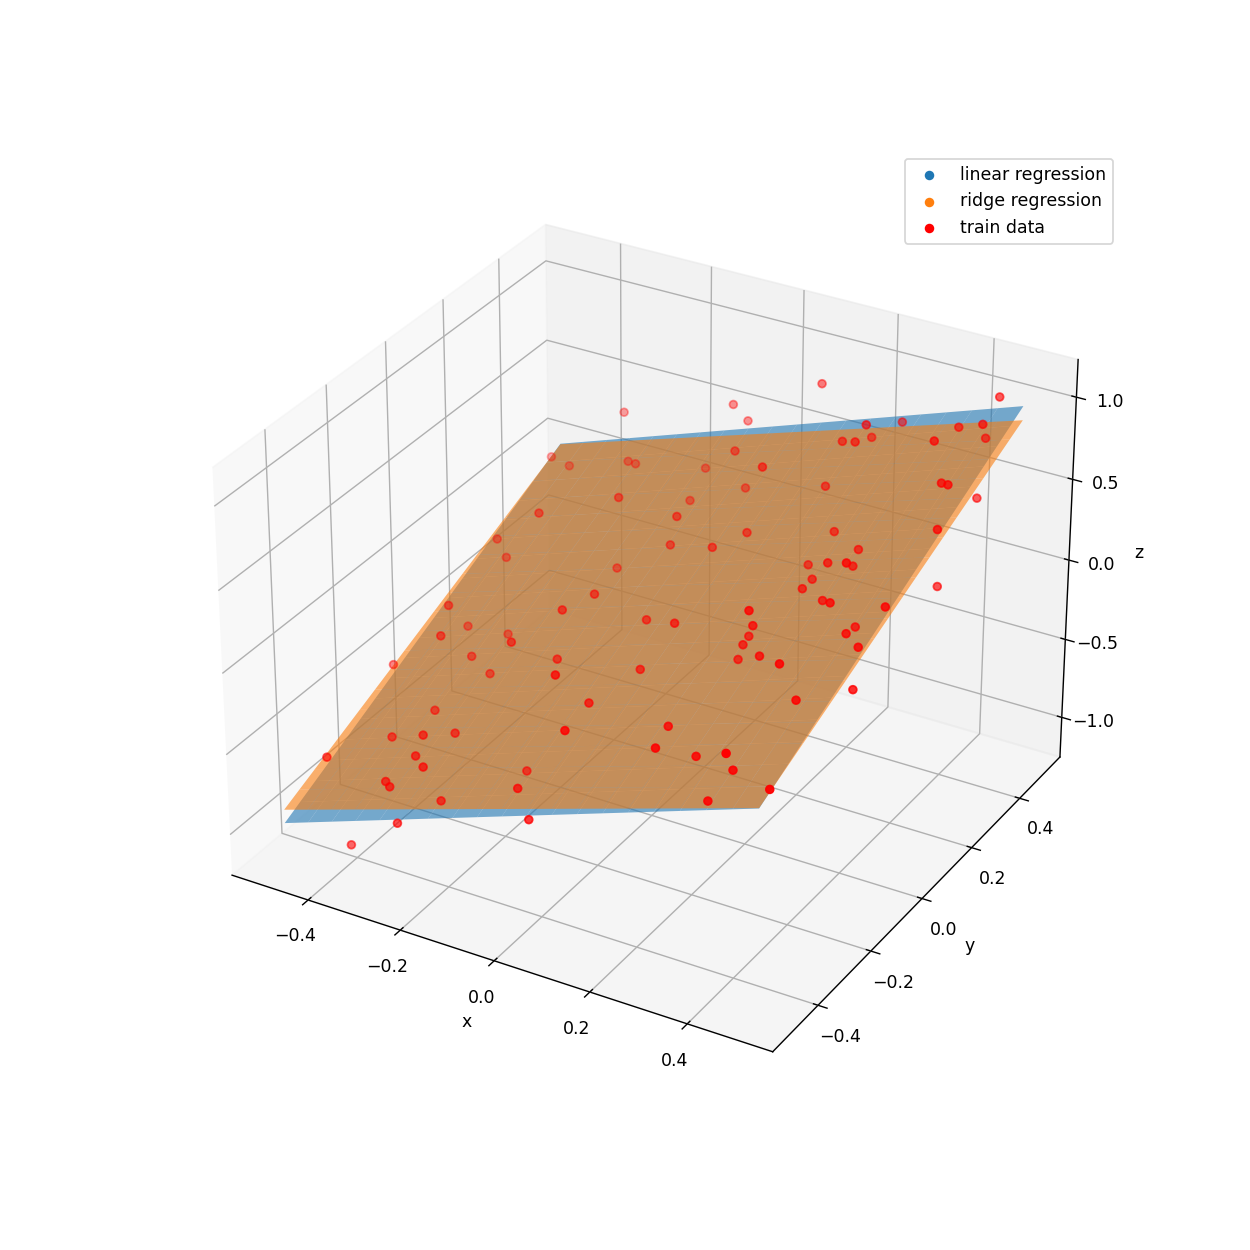

In [6]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection="3d")
x_axis = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 20)
y_axis = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 20)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)
z_axis_1 = theta_linear_regression[0] * x_axis + theta_linear_regression[1] * y_axis
z_axis_2 = theta_ridge_regression[0] * x_axis + theta_ridge_regression[1] * y_axis
ax.plot_surface(x_axis, y_axis, z_axis_1, alpha = 0.6)
ax.plot_surface(x_axis, y_axis, z_axis_2, alpha = 0.6)
fake_sct_1 = ax.scatter([], [], [], label="linear regression")
fake_sct_2 = ax.scatter([], [], [], label="ridge regression")
sct = ax.scatter(X[:, 0], X[:, 1], y, label="train data", color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()

### Analytical question
#### Q2. So far we have implemented linear regression and ridge regression. Now let us try to use our models on some special datasets. Run following code several timesto compare the difference between linear regression and ridge regression. Analyze the role of regularization in ridge regression.

[-0.41749723  0.82971712]
[0.8555826  1.11446101]


<IPython.core.display.Javascript object>


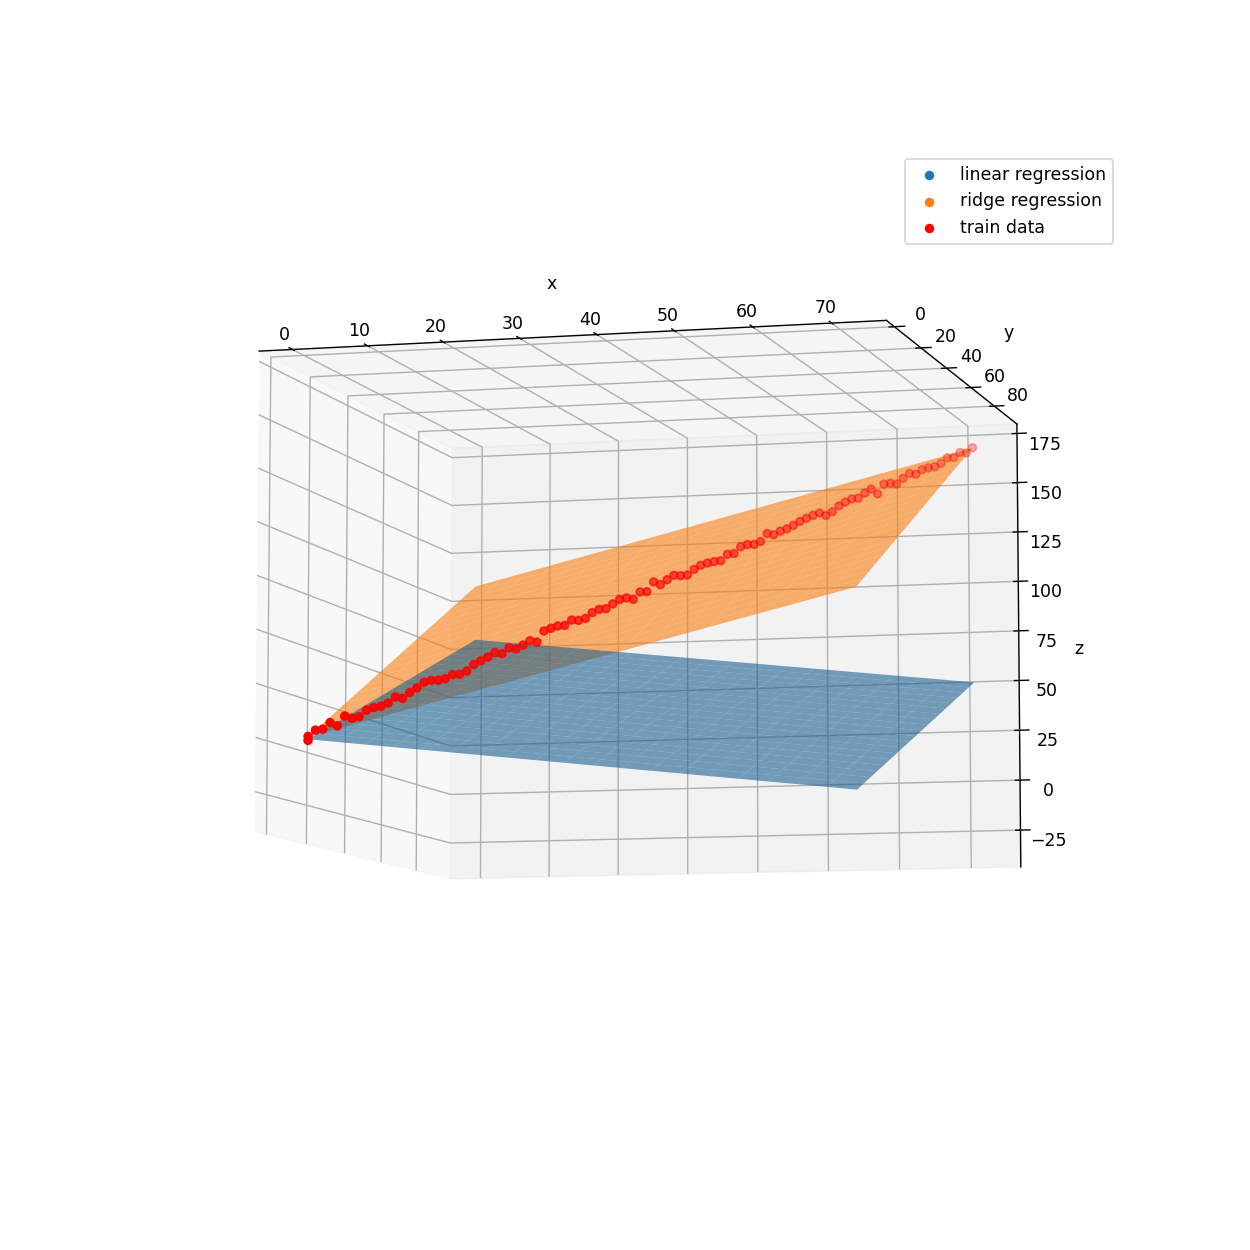

In [7]:
# generate ill-posed problem
X = np.random.rand(1, num_features)
for i in range(1, num_samples):
    X = np.vstack([X, i * X[0]] )
y = X@theta_ + np.random.normal(scale=1, size=(num_samples))
theta_linear_regression = linear_regression(X, y)
print(theta_linear_regression)
theta_ridge_regression = ridge_regression(X, y, 0.1)
print(theta_ridge_regression)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection="3d")
x_axis = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 20)
y_axis = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 20)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)
z_axis_1 = theta_linear_regression[0] * x_axis + theta_linear_regression[1] * y_axis
z_axis_2 = theta_ridge_regression[0] * x_axis + theta_ridge_regression[1] * y_axis
ax.plot_surface(x_axis, y_axis, z_axis_1, alpha = 0.6)
ax.plot_surface(x_axis, y_axis, z_axis_2, alpha = 0.6)
fake_sct_1 = ax.scatter([], [], [], label="linear regression")
fake_sct_2 = ax.scatter([], [], [], label="ridge regression")
ax.scatter(X[:, 0], X[:, 1], y, label="train data", color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()

**Your answer:** From the figure we can see that the samples almost lies on a line in 3D space. Our generated data are multicolinear, because all the other samples are derived from the first sample. In this situation, the rank of observation matrix is $1$, and $X^TX$ is a singular matrix, which means it's non-inversible. There can be infinitely many solutions. Sometimes the program doesn't give a error (singular matrix) due to the numerical precision of floating point numbers， however it's still very unstable. Using an addition regularization term can make the matrix inversible and leads to more stable solution.  